In [46]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import math

In [2]:
#ESERCIZIO 0

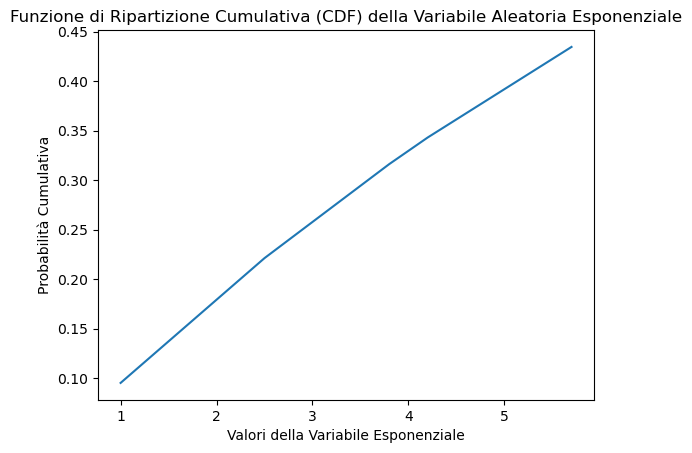

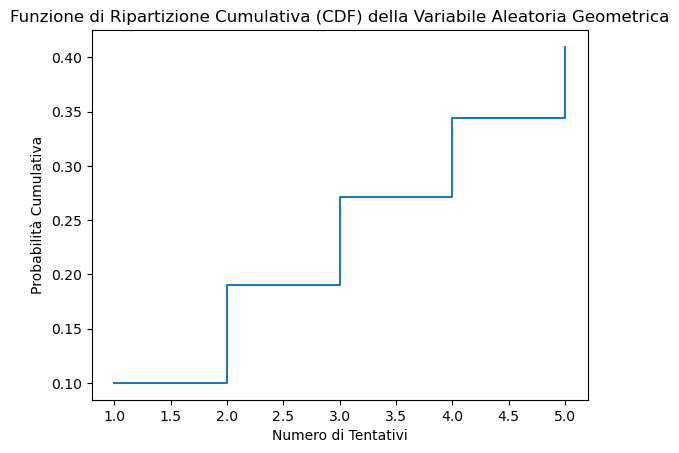

In [8]:
'''
2. Tracciare il grafico della funzione di distribuzione cumulativa di una variabile aleatoria esponenziale e di
una variabile aleatoria geometrica, entrambe di parametro 0.1.
'''
data = {'variabile_esponenziale': [1.0, 2.5, 3.8, 4.2, 5.7]}
df = pd.DataFrame(data)

# Definire il parametro della distribuzione esponenziale
lambda_param = 0.1  # parametro di tasso

# Calcolare la funzione di ripartizione cumulativa (CDF)
values = np.sort(df['variabile_esponenziale'])
cdf = 1 - np.exp(-lambda_param * values)

# Visualizzare la funzione di ripartizione cumulativa (CDF) con un grafico a linea
plt.plot(values, cdf)
plt.title('Funzione di Ripartizione Cumulativa (CDF) della Variabile Aleatoria Esponenziale')
plt.xlabel('Valori della Variabile Esponenziale')
plt.ylabel('Probabilità Cumulativa')
plt.show() 


# Creare un DataFrame di esempio
data = {'variabile_geometrica': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)
# Definire il parametro della distribuzione geometrica
p = 0.1  # probabilità di successo in ogni prova

# Calcolare la funzione di ripartizione cumulativa (CDF)
values = np.arange(1, max(df['variabile_geometrica']) + 1)
cdf = st.geom.cdf(values, p)

# Visualizzare la funzione di ripartizione cumulativa (CDF) con un grafico a gradino (plt.step)
plt.step(values, cdf, where='post')
plt.title('Funzione di Ripartizione Cumulativa (CDF) della Variabile Aleatoria Geometrica')
plt.xlabel('Numero di Tentativi')
plt.ylabel('Probabilità Cumulativa')
plt.show()

In [9]:
#ESERCIZIO 1

In [11]:
astici = pd.read_csv('astici.csv', sep=',', decimal='.')
astici

,kg.di.pesce,settore.di.pesca,forza.del.mare,peso.astice
0,0.020205,B,9,29.9
1,0.300007,G,9,29.3
2,1.779424,B,9,29.9
3,0.935345,E,7,29.9
4,0.450751,B,8,28.4
...,...,...,...,...
276,0.403444,B,1,8.6
277,2.703744,A,0,5.9
278,4.308614,B,0,3.8
279,4.353504,B,0,2.6


In [12]:
#1. Quanti astici sono stati trovati?
len(astici)

281

In [14]:
#2. Quanti sono i settori di pesca della parte di mare considerata?
len(astici['settore.di.pesca'].unique())

9

In [15]:
#3. Quanti astici sono stati trovati nel settore "A"
len(astici[astici['settore.di.pesca'] == 'A'])

37

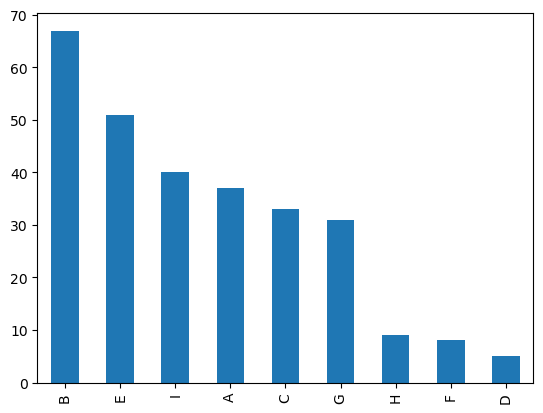

In [17]:
#4. Tracciare un grafico opportuno per visualizzare le frequenze dei settori di pesca nel dataset
astici['settore.di.pesca'].value_counts().plot.bar()
plt.show()

In [20]:
#5. Qual'è stato il settore di pesca dove sono stati trovati più astici?
print('guardando il grafico a barre, si vede come il settore più proficuo è il B')

guardando il grafico a barre, si vede come il settore più proficuo è il B


In [21]:
#6. Percentuale di astici trovati in tale settore?
(len(astici[astici['settore.di.pesca'] == 'B'])/len(astici))*100

23.843416370106763

In [24]:
#7. il carattere forza.del.mare di che tipo è?
print(astici['forza.del.mare'])
print('il carattere forz.del.mare è di tipo categorico')

0      9
1      9
2      9
3      7
4      8
      ..
276    1
277    0
278    0
279    0
280    0
Name: forza.del.mare, Length: 281, dtype: int64
il carattere forz.del.mare è di tipo categorico


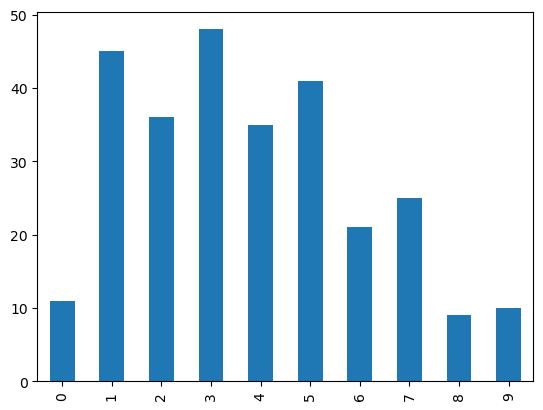

In [28]:
#8. Tracciare un grafico opportuno per descrivere la forza.del.mare
astici['forza.del.mare'].value_counts().sort_index().plot.bar()
plt.show()

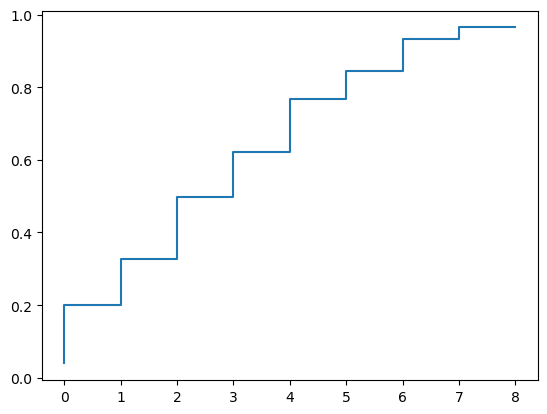

In [29]:
#9. Tracciare il grafico della funzione cumulativa empirica di forza.del.mare
ecdf = sm.distributions.ECDF(astici['forza.del.mare'])
x = np.arange(astici['forza.del.mare'].min(), astici['forza.del.mare'].max())
y = ecdf(x)
plt.step(x, y)
plt.show()

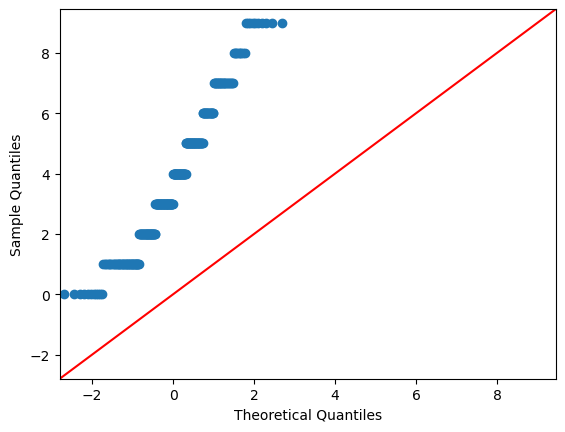

il qqplot evidenzia come non ci sia alcuna correlazione tra la distribuzione della forza.del.mare e la
distribuzione normale.


In [33]:
#10. forza.del.mare è distribuita secondo un modello normale? Giustificare la risposta
sm.qqplot(astici['forza.del.mare'], line='45')
plt.show()
print('il qqplot evidenzia come non ci sia alcuna correlazione tra la distribuzione della forza.del.mare e la\ndistribuzione normale.')

In [34]:
#11. Qual'è stata la forza del mare media?
astici['forza.del.mare'].mean()

3.804270462633452

In [35]:
#12. Qual'è stata la forza del mare riscontrata più frequentemente?
astici['forza.del.mare'].mode()

0    3
Name: forza.del.mare, dtype: int64

In [36]:
#Concentriamoci ora sul peso degli astici trovati

In [38]:
#13. peso.astice che tipo di carattere è?
astici['peso.astice']
print('quantitativo continuo')

quantitativo continuo


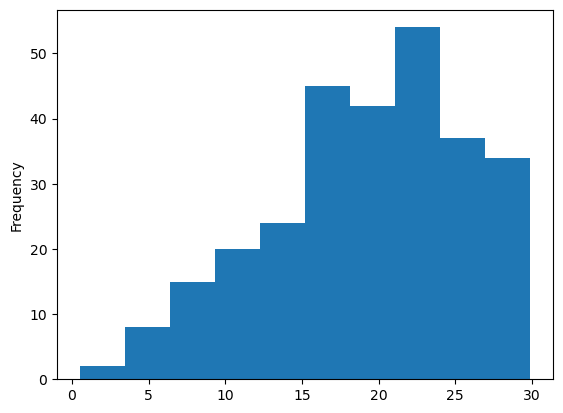

In [40]:
#14. Tracciare un grafico opportuno per descrivere il peso.astice
astici['peso.astice'].plot.hist()
plt.show()

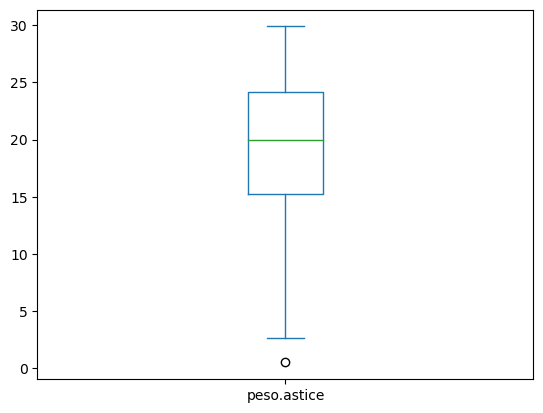

il peso.astice outlier vale 0.5


In [43]:
#15. Il dataset presenta un outlier per peso.astice: evidenziarlo mediante un opportuno grafico
astici['peso.astice'].plot.box()
plt.show()
print('il peso.astice outlier vale', astici['peso.astice'].min())

In [44]:
#16. Memorizzare in astici_filtrato il dataset ottenuto rimuovendo la riga corrispondente a tale outlier
astici_filtrato = astici[astici['peso.astice'] > 0.5]
astici_filtrato

,kg.di.pesce,settore.di.pesca,forza.del.mare,peso.astice
0,0.020205,B,9,29.9
1,0.300007,G,9,29.3
2,1.779424,B,9,29.9
3,0.935345,E,7,29.9
4,0.450751,B,8,28.4
...,...,...,...,...
275,45.389504,C,0,7.1
276,0.403444,B,1,8.6
277,2.703744,A,0,5.9
278,4.308614,B,0,3.8


In [45]:
#17. Stimare valore atteso e varianza del peso degli astici pescati, escludendo l'outlier
print(astici_filtrato['peso.astice'].mean(), astici_filtrato['peso.astice'].var())

19.354285714285737 40.49094930875574


In [49]:
'''
#18 Sempre escludendo l’outlier e sfruttando opportunamente i risultati ottenuti al punto precedente, fornire
una maggiorazione della probabilità che il peso di un astice disti dal suo valore atteso, per eccesso o per
difetto, almeno 10 hg.
'''
Z = st.norm()
arg = (10*math.sqrt(len(astici_filtrato)))/astici_filtrato.std()
print(2*Z.cdf(arg) -1)

[1. 1. 1.]


C:\Users\cola0\AppData\Local\Temp\ipykernel_9476\3707036597.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  arg = (10*math.sqrt(len(astici_filtrato)))/astici_filtrato.std()


In [50]:
#19. Usando il dataset completo, stabilire se esiste una relazione tra

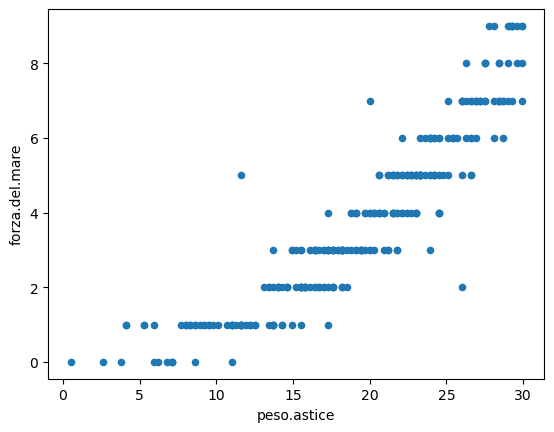

lo scatter plot evidenzia una relazione di tipo diretto tra peso.astice e forza del mare


In [59]:
#19.1 peso.astice e forza.del.mare
astici.plot.scatter('peso.astice', 'forza.del.mare')
plt.show()
print('lo scatter plot evidenzia una relazione di tipo diretto tra peso.astice e forza del mare')

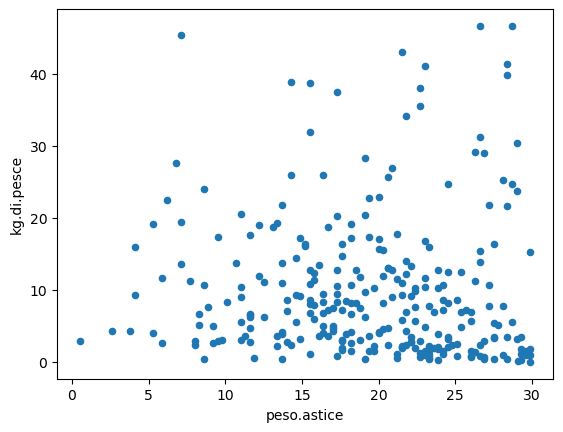

lo scatter plot evidenzia come non ci sia alcun tipo di relazione tra peso.astice e kg.di.pesce


In [54]:
#19.2 peso.astice e kg.di.pesce
astici.plot.scatter('peso.astice', 'kg.di.pesce')
plt.show()
print('lo scatter plot evidenzia come non ci sia alcun tipo di relazione tra peso.astice e kg.di.pesce')

In [65]:
#20. Usare un indice opportuno per confermare le ipotesi dei punti 19.1 e 19.2
print(astici['peso.astice'].corr(astici['forza.del.mare']))
print('indice di correlazione prossimo ad 1 conferma esistenza di una relazione diretta tra peso.astici e forza.del.mare\n')
print(astici['peso.astice'].corr(astici['kg.di.pesce']))
print('indice di correlazione prossimo a 0 conferma inesistenza di alcuna relazione tra peso.astici e kg.di.pesce')

0.9156381240896678
indice di correlazione prossimo ad 1 conferma esistenza di una relazione diretta tra peso.astici e forza.del.mare

-0.02664176736960961
indice di correlazione prossimo a 0 conferma inesistenza di alcuna relazione tra peso.astici e kg.di.pesce


In [68]:
'''
21. I pescatori vorrebbero qualche garanzia riguardo alla stima del valore atteso del peso.astice. In particolare,
noto il numero di astici pescati (è stato richiesto al punto 1. di questo esercizio), vorrebbero che la
probabilità di errore nella stima fosse almeno uguale a 0.9. Qual è allora l’errore (espresso in hg) che
devono essere disposti a tollerare?
'''
Z = st.norm()

k = astici['peso.astice'].std()/math.sqrt(len(astici))
arg = 1-(0.1/2)
k*Z.ppf(arg)

0.6329658737263553

In [69]:
#ESERCIZIO 2

In [70]:
#Concentriamoci ora sui kg.di.pesce

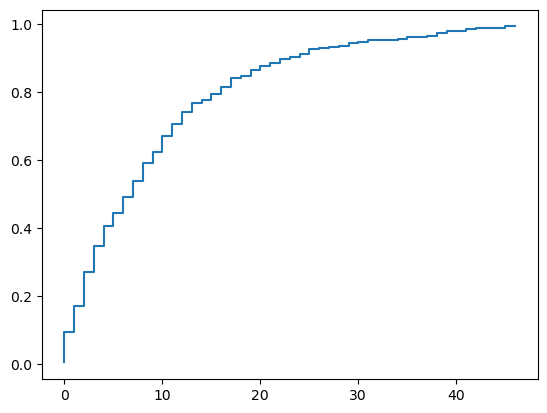

In [71]:
#1. Tracciare la funzione cumulativa empirica del carattere kg.di.pesce
ecdf = sm.distributions.ECDF(astici['kg.di.pesce'])
x = np.arange(astici['kg.di.pesce'].min(), astici['kg.di.pesce'].max())
y = ecdf(x)
plt.step(x, y)
plt.show()

In [72]:
2# Stimare valore atteso e varianza dei kg.di.pesce
print(astici['kg.di.pesce'].mean(), astici['kg.di.pesce'].var())

10.078838086708181 97.31706478393654


In [73]:
#3. Gli stimatori del punto precedente sono non deviati? Giustificare
print('La media campionaria è sempre non deviata per il valore atteso e la varianza campionaria\nè sempre non deviata per la varianza')

La media campionaria è sempre non deviata per il valore atteso e la varianza campionaria
è sempre non deviata per la varianza


0      0.020205
1      0.300007
2      1.779424
3      0.935345
4      0.450751
         ...   
276    0.403444
277    2.703744
278    4.308614
279    4.353504
280    2.886564
Name: kg.di.pesce, Length: 281, dtype: float64
kg.di.pesce è un carattere continuo, per cui scartiamo i modelli con supporto discreto.


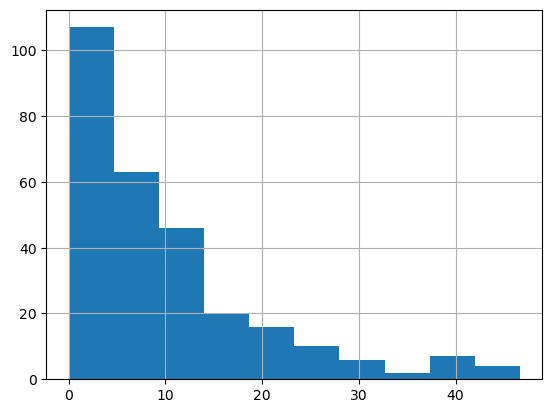

istogramma non assume la forma a campana che caratterizza la distribuzione normale, per cui
non è nemmeno un modello normale.
si vede però come esso assume un decadimento esponenziale, per cui è ragionevole assimilarlo ad un modello esponenziale.
10.078838086708181 9.864941195158567
i valori di valore atteso e deviazione standard molto simili confermano tale ipotesi.


In [84]:
#4. C'è un modello probabilistico che descrive kg.di.pesce: quale potrebbe essere? Giustificare
print(astici['kg.di.pesce'])
print('kg.di.pesce è un carattere continuo, per cui scartiamo i modelli con supporto discreto.')
astici['kg.di.pesce'].hist()
plt.show()
print('istogramma non assume la forma a campana che caratterizza la distribuzione normale, per cui\nnon è nemmeno un modello normale.')
print('si vede però come esso assume un decadimento esponenziale, per cui è ragionevole assimilarlo ad un modello esponenziale.')
print(astici['kg.di.pesce'].mean(), astici['kg.di.pesce'].std())
print('i valori di valore atteso e deviazione standard molto simili confermano tale ipotesi.')

In [83]:
#5 Stimare il parametro che caratterizza il modello identificato al punto precedente
lambd = 1/astici['kg.di.pesce'].mean()
lambd

0.09921778595875896